# Clustering substractivo

Crear un modelo de Sugeno del comportamiento de un diodo, para lo cual se ha medido la tensión en sus bornes y la
corriente que lo atraviesa. Los datos obtenidos se encuentran en el archivo diodo.txt. El modelo logrado deberá tener no
más de dos reglas.

### Setup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import distance_matrix

In [ ]:
"""Subtractive Clustering Algorithm
"""
__author__ = 'Daniel Albornoz'


import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import distance_matrix

def subclust2(data, Ra, Rb=0, AcceptRatio=0.3, RejectRatio=0.1):
    if Rb==0:
        Rb = Ra*1.15

    scaler = MinMaxScaler()
    scaler.fit(data)
    ndata = scaler.transform(data)

    # 14/05/2020 cambio list comprehensions por distance matrix
    #P = np.array([np.sum([np.exp(-(np.linalg.norm(u-v)**2)/(Ra/2)**2) for v in ndata]) for u in ndata])
    #print(P)
    P = distance_matrix(ndata,ndata)
    alpha=(Ra/2)**2
    P = np.sum(np.exp(-P**2/alpha),axis=0)

    centers = []
    i=np.argmax(P)
    C = ndata[i]
    p=P[i]
    centers = [C]

    continuar=True
    restarP = True
    while continuar:
        pAnt = p
        if restarP:
            P=P-p*np.array([np.exp(-np.linalg.norm(v-C)**2/(Rb/2)**2) for v in ndata])
        restarP = True
        i=np.argmax(P)
        C = ndata[i]
        p=P[i]
        if p>AcceptRatio*pAnt:
            centers = np.vstack((centers,C))
        elif p<RejectRatio*pAnt:
            continuar=False
        else:
            dr = np.min([np.linalg.norm(v-C) for v in centers])
            if dr/Ra+p/pAnt>=1:
                centers = np.vstack((centers,C))
            else:
                P[i]=0
                restarP = False
        if not any(v>0 for v in P):
            continuar = False
    distancias = [[np.linalg.norm(p-c) for p in ndata] for c in centers]
    labels = np.argmin(distancias, axis=0)
    centers = scaler.inverse_transform(centers)
    return labels, centers

### Data loading

xmin: 0.46 - xmax: 0.665 - ymin: 0.0000500000 - ymax: 0.0060606000


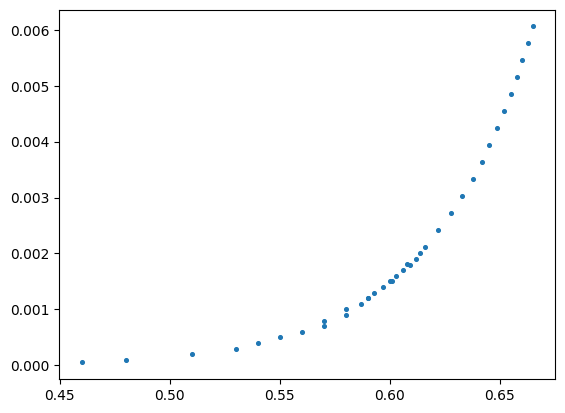

In [27]:
data = np.loadtxt("diodo.txt")

x_min = np.min(data[:,0])
x_max = np.max(data[:,0])
y_min = np.min(data[:,1])
y_max = np.max(data[:,1])
print(f'xmin: {x_min} - xmax: {x_max} - ymin: {y_min:.10f} - ymax: {y_max:.10f}')

plt.scatter(data[:,0], data[:,1],s=7)
plt.show()


### Data clustering

In [ ]:
from sklearn.cluster import KMeans, SpectralClustering
cant_clusters = 2
spectral_clustering = SpectralClustering(3, affinity ='rbf', n_init=100, assign_labels='discretize')
spectral_clustering.fit(data)
plt.scatter(data[:, 0], data[:, 1], c=spectral_clustering.labels_, cmap='viridis', s = 7)
plt.title('Spectral clustering')
plt.show()

cant_clusters = 2
kmeans = KMeans(n_clusters = cant_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(data)
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis', s = 7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='*', s=50)
plt.title(f'Kmeans, centers= {kmeans.cluster_centers_.shape} ')
plt.show()


In [ ]:
labels, centers = subclust2(data, Ra = 0.6, Rb=0.75, AcceptRatio=0.3, RejectRatio=0.1) #Ra, Rb=0, AcceptRatio=0.3, RejectRatio=0.1):
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s = 7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='*', s=50)
plt.title('Clustering Substractivo')
plt.show()
labels, centers = subclust2(data, Ra = 0.8, Rb=1, AcceptRatio=0.3, RejectRatio=0.1) #Ra, Rb=0, AcceptRatio=0.3, RejectRatio=0.1):
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s = 7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='*', s=50)
plt.title('Clustering Substractivo')
plt.show()
labels, centers = subclust2(data, Ra = 0.5, Rb=.8, AcceptRatio=0.2, RejectRatio=0.1) #Ra, Rb=0, AcceptRatio=0.3, RejectRatio=0.1):
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s = 7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='*', s=50)
plt.title('Clustering Substractivo')
plt.show()

### Data segmentation

In [ ]:

segmented_data = []
n_clusters = len(kmeans.cluster_centers_)
for center in range(n_clusters):
    segmented_data.append(data[kmeans.labels_ == center])
    plt.scatter(segmented_data[center][:, 0], segmented_data[center][:, 1], cmap='viridis', s = 7)
    plt.title(f'Data in cluster {center} ')
    plt.xlim([.45,.70])
    plt.ylim([0,.006])
    plt.show()

In [ ]:
c1 = np.random.rand(150,2)+[1,1]
c2 = np.random.rand(100,2)+[10,1.5]
c3 = np.random.rand(50,2)+[4.9,5.8]
m = np.append(c1,c2, axis=0)
m = np.append(m,c3, axis=0)

r,c = subclust2(m,1)

plt.figure()
plt.scatter(m[:,0],m[:,1], c=r)
plt.scatter(c[:,0],c[:,1], marker='X')

### Linear regression

0.95261176482318


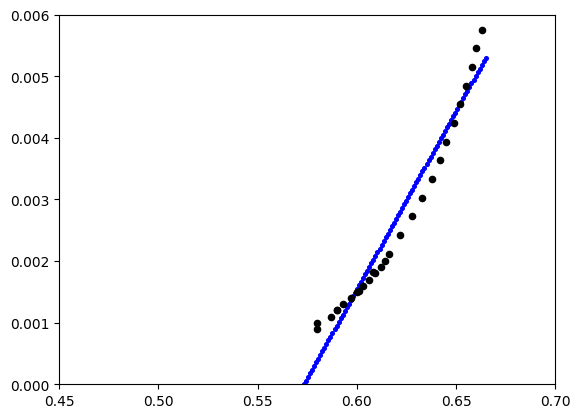

In [33]:
from sklearn.linear_model import LinearRegression
x = np.reshape(segmented_data[0][:,0],(-1 ,1))
y = np.reshape(segmented_data[0][:,1],(-1 ,1))
lin_reg = LinearRegression().fit(x,y)

print(lin_reg.score(x,y)) #cuanto ams cercano a 1 mejor

data_test_x = np.linspace(x_min,x_max,200) #test data
data_test_x = np.reshape(data_test_x,(-1,1))

data_test_y = lin_reg.predict(data_test_x)

plt.scatter(data_test_x, data_test_y,c='blue',s=7)
plt.scatter(x, y,c='black',s=20)
plt.xlim([.45,.70])
plt.ylim([0,.006])
plt.show()



# GEN Fis
## Generación de FIS a partir de agrupamiento de los datos de entrenamiento

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed May  6 17:56:16 2020

@author: Daniel Albornoz

Implementación similar a genfis2 de Matlab.
Sugeno type FIS. Generado a partir de clustering substractivo.

"""
__author__ = 'Daniel Albornoz'

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
import time

def gaussmf(data, mean, sigma):
    return np.exp(-((data - mean)**2.) / (2 * sigma**2.))

class fisRule:
    def __init__(self, centroid, sigma):
        self.centroid = centroid
        self.sigma = sigma

class fisInput:
    def __init__(self, min,max, centroids):
        self.minValue = min
        self.maxValue = max
        self.centroids = centroids


    def view(self):
        x = np.linspace(self.minValue,self.maxValue,20)
        plt.figure()
        for m in self.centroids:
            s = (self.minValue-self.maxValue)/8**0.5
            y = gaussmf(x,m,s)
            plt.plot(x,y)

class fis:
    def __init__(self):
        self.rules=[]
        self.memberfunc = []
        self.inputs = []



    def genfis(self, data, radii):

        start_time = time.time()
        labels, cluster_center = subclust2(data, radii)

        print("--- %s seconds ---" % (time.time() - start_time))
        n_clusters = len(cluster_center)

        cluster_center = cluster_center[:,:-1]
        P = data[:,:-1]
        #T = data[:,-1]
        maxValue = np.max(P, axis=0)
        minValue = np.min(P, axis=0)

        self.inputs = [fisInput(maxValue[i], minValue[i],cluster_center[:,i]) for i in range(len(maxValue))]
        self.rules = cluster_center
        self.entrenar(data)

    def entrenar(self, data):
        P = data[:,:-1]
        T = data[:,-1]
        #___________________________________________
        # MINIMOS CUADRADOS (lineal)
        sigma = np.array([(i.maxValue-i.minValue)/np.sqrt(8) for i in self.inputs])
        f = [np.prod(gaussmf(P,cluster,sigma),axis=1) for cluster in self.rules]

        nivel_acti = np.array(f).T
        #print("nivel acti")
        #print(nivel_acti)
        sumMu = np.vstack(np.sum(nivel_acti,axis=1))
        #print("sumMu")
        #print(sumMu)
        P = np.c_[P, np.ones(len(P))]
        n_vars = P.shape[1]

        orden = np.tile(np.arange(0,n_vars), len(self.rules))
        acti = np.tile(nivel_acti,[1,n_vars])
        inp = P[:, orden]


        A = acti*inp/sumMu

        # A = np.zeros((N, 2*n_clusters))
        # for jdx in range(n_clusters):
        #     for kdx in range(nVar):
        #         A[:, jdx+kdx] = nivel_acti[:,jdx]*P[:,kdx]/sumMu
        #         A[:, jdx+kdx+1] = nivel_acti[:,jdx]/sumMu

        b = T

        solutions, residuals, rank, s = np.linalg.lstsq(A,b,rcond=None)
        self.solutions = solutions #.reshape(n_clusters,n_vars)
        print(solutions)
        return 0

    def evalfis(self, data):
        sigma = np.array([(input.maxValue-input.minValue) for input in self.inputs])/np.sqrt(8)
        f = [np.prod(gaussmf(data,cluster,sigma),axis=1) for cluster in self.rules]
        nivel_acti = np.array(f).T
        sumMu = np.vstack(np.sum(nivel_acti,axis=1))

        P = np.c_[data, np.ones(len(data))]

        n_vars = P.shape[1]
        n_clusters = len(self.rules)

        orden = np.tile(np.arange(0,n_vars), n_clusters)
        acti = np.tile(nivel_acti,[1,n_vars])
        inp = P[:, orden]
        coef = self.solutions

        return np.sum(acti*inp*coef/sumMu,axis=1)


    def viewInputs(self):
        for input in self.inputs:
            input.view()






# Test genfis 1 entrada

In [ ]:
#test genfis 1D
def my_exponential(A, B, C, x):
    return A*np.exp(-B*x)+C

data_x = np.arange(-10,10,0.1)
data_y = -0.5*data_x**3-0.6*data_x**2+10*data_x+1 #my_exponential(9, 0.5,1, data_x)

plt.plot(data_x, data_y)
# plt.ylim(-20,20)
plt.xlim(-7,7)

data = np.vstack((data_x, data_y)).T

fis2 = fis()
fis2.genfis(data, 1.1)
fis2.viewInputs()
r = fis2.evalfis(np.vstack(data_x))

plt.figure()
plt.plot(data_x,data_y)
plt.plot(data_x,r,linestyle='--')

fis2.solutions

# r1 = data_x*-2.29539539+ -41.21850973
# r2 = data_x*-15.47376916 -79.82911266
# r3 = data_x*-15.47376916 -79.82911266
# plt.plot(data_x,r1)
# plt.plot(data_x,r2)
# plt.plot(data_x,r3)

# Test genfis 2 entradas

In [ ]:
from matplotlib import cm

x=np.linspace(-10,10,50)
X,Y = np.meshgrid(x,x)
Z = X**2+Y**2

data = np.vstack((X.ravel(), Y.ravel(), Z.ravel())).T

fis3 = fis()
fis3.genfis(data,1.2)
fis3.viewInputs()

r = fis3.evalfis(np.vstack((X.ravel(), Y.ravel())).T)
r = np.reshape(r, X.shape)


fig = plt.figure()
ax = fig.add_subplot(projection = '3d') #fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,Z, cmap=cm.Blues,
                        linewidth=0, antialiased=False, alpha=0.3)

surf = ax.plot_surface(X,Y, r, cmap=cm.Reds,
                        linewidth=0, antialiased=False, alpha=0.8)


In [ ]:
fis2.rules

In [ ]:
fis3.rules